In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
upstream_file_cross = "raw/upstream-cross900mbps-10pkt_per_sec.csv"
downstream_file_cross = "raw/downstream-cross900mbps-10pkt_per_sec.csv"
upstream_file_nocross = "raw/upstream-nocross-10pkt_per_sec.csv"
downstream_file_nocross = "raw/downstream-nocross-10pkt_per_sec.csv"
upstream_file_nocross_vlan = "raw/upstream-nocross_vlan-10pkt_per_sec.csv"
downstream_file_nocross_vlan = "raw/downstream-nocross_vlan-10pkt_per_sec.csv"
colnames = ['t','pktid']
df_upstream_cross = pd.read_csv(upstream_file_cross, names=colnames, header=None)
df_downstream_cross = pd.read_csv(downstream_file_cross, names=colnames, header=None)
df_upstream_nocross = pd.read_csv(upstream_file_nocross, names=colnames, header=None)
df_downstream_nocross = pd.read_csv(downstream_file_nocross, names=colnames, header=None)
df_upstream_nocross_vlan = pd.read_csv(upstream_file_nocross_vlan, names=colnames, header=None)
df_downstream_nocross_vlan = pd.read_csv(downstream_file_nocross_vlan, names=colnames, header=None)

In [4]:
df_upstream_nocross.head()
df_upstream_nocross_vlan.head()
df_upstream_cross.head()

,t,pktid
0,1697189070697084090,310a
1,1697189070801220870,320a
2,1697189070904856900,330a
3,1697189071009149910,340a
4,1697189071112806440,350a


In [5]:
df_downstream_nocross.head()
df_downstream_nocross_vlan.head()
df_downstream_cross.head()

,t,pktid
0,1697189070697100230,310a
1,1697189070801237000,320a
2,1697189070904873030,330a
3,1697189071009166040,340a
4,1697189071112822570,350a


In [6]:
df_nocross = pd.merge(df_upstream_nocross, df_downstream_nocross, on='pktid', how='left')
df_nocross.insert(loc=3, column='latency', value=(df_nocross.t_y-df_nocross.t_x))
df_nocross.head()
df_nocross_vlan = pd.merge(df_upstream_nocross_vlan, df_downstream_nocross_vlan, on='pktid', how='left')
df_nocross_vlan.insert(loc=3, column='latency', value=(df_nocross_vlan.t_y-df_nocross_vlan.t_x))
df_nocross_vlan.head()
df_cross = pd.merge(df_upstream_cross, df_downstream_cross, on='pktid', how='left')
df_cross.insert(loc=3, column='latency', value=(df_cross.t_y-df_cross.t_x))
df_cross.head()

,t_x,pktid,t_y,latency
0,1697189070697084090,310a,1697189070697100230,16140
1,1697189070801220870,320a,1697189070801237000,16130
2,1697189070904856900,330a,1697189070904873030,16130
3,1697189071009149910,340a,1697189071009166040,16130
4,1697189071112806440,350a,1697189071112822570,16130


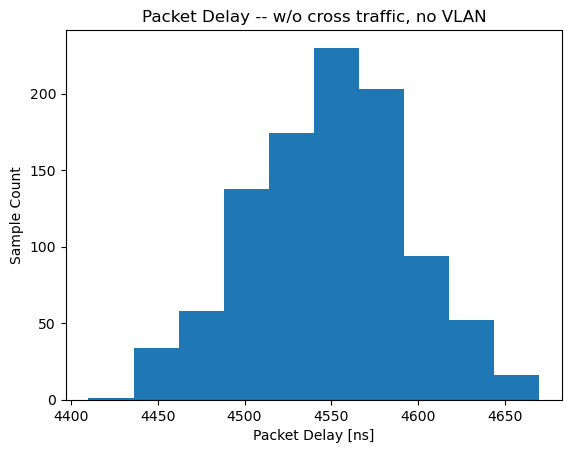

In [7]:
bin_sizes, _, _ = plt.hist(df_nocross.latency)
plt.ylabel('Sample Count')
plt.xlabel('Packet Delay [ns]');
plt.title('Packet Delay -- w/o cross traffic, no VLAN');

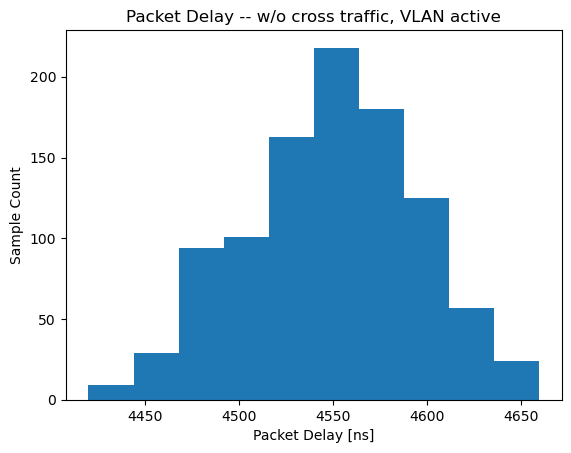

In [8]:
bin_sizes, _, _ = plt.hist(df_nocross_vlan.latency)
plt.ylabel('Sample Count')
plt.xlabel('Packet Delay [ns]');
plt.title('Packet Delay -- w/o cross traffic, VLAN active');

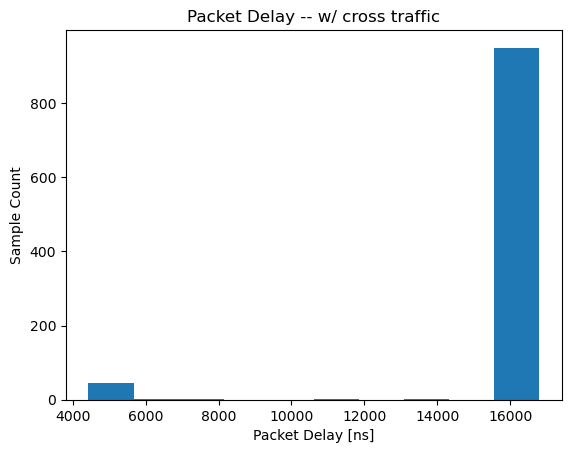

In [9]:
bin_sizes, _, _ = plt.hist(df_cross.latency)
plt.ylabel('Sample Count')
plt.xlabel('Packet Delay [ns]');
plt.title('Packet Delay -- w/ cross traffic');

In [9]:
latency_min = df_nocross.latency.min()
latency_max = df_nocross.latency.max()
latency_mean = df_nocross.latency.mean()
latency_std = np.std(df_nocross.latency)
latency_sem = stats.sem(df_nocross.latency)
# 95 % confidence interval of the mean value
latencymean_l,latencymean_h = stats.norm.interval(0.95, loc=latency_mean, scale=latency_sem)

print("Statistics -- w/o cross traffic")
print("min(latency) = " + str(latency_min) + " ns")
print("max(latency) = " + str(latency_max) + " ns")
print("mean(latency) = " + str(latency_mean) + " ns")
print("95 % confidence interval of the mean = [" + str(latencymean_l) + "," + str(latencymean_h) + "]")

Statistics -- w/o cross traffic
min(latency) = 4410 ns
max(latency) = 4670 ns
mean(latency) = 4546.4 ns
95 % confidence interval of the mean = [4543.596713121771,4549.203286878228]


In [10]:
latency_min = df_nocross_vlan.latency.min()
latency_max = df_nocross_vlan.latency.max()
latency_mean = df_nocross_vlan.latency.mean()
latency_std = np.std(df_nocross_vlan.latency)
latency_sem = stats.sem(df_nocross_vlan.latency)
# 95 % confidence interval of the mean value
latencymean_l,latencymean_h = stats.norm.interval(0.95, loc=latency_mean, scale=latency_sem)

print("Statistics -- w/o cross traffic, vlan")
print("min(latency) = " + str(latency_min) + " ns")
print("max(latency) = " + str(latency_max) + " ns")
print("mean(latency) = " + str(latency_mean) + " ns")
print("95 % confidence interval of the mean = [" + str(latencymean_l) + "," + str(latencymean_h) + "]")

Statistics -- w/o cross traffic, vlan
min(latency) = 4420 ns
max(latency) = 4660 ns
mean(latency) = 4547.48 ns
95 % confidence interval of the mean = [4544.620481610812,4550.339518389187]


In [11]:
latency_min = df_cross.latency.min()
latency_max = df_cross.latency.max()
latency_mean = df_cross.latency.mean()
latency_std = np.std(df_cross.latency)
latency_sem = stats.sem(df_cross.latency)
# 95 % confidence interval of the mean value
latencymean_l,latencymean_h = stats.norm.interval(0.95, loc=latency_mean, scale=latency_sem)

print("Statistics -- w/ cross traffic")
print("min(latency) = " + str(latency_min) + " ns")
print("max(latency) = " + str(latency_max) + " ns")
print("mean(latency) = " + str(latency_mean) + " ns")
print("95 % confidence interval of the mean = [" + str(latencymean_l) + "," + str(latencymean_h) + "]")

Statistics -- w/ cross traffic
min(latency) = 4430 ns
max(latency) = 16800 ns
mean(latency) = 15561.87 ns
95 % confidence interval of the mean = [15408.448132654095,15715.291867345906]


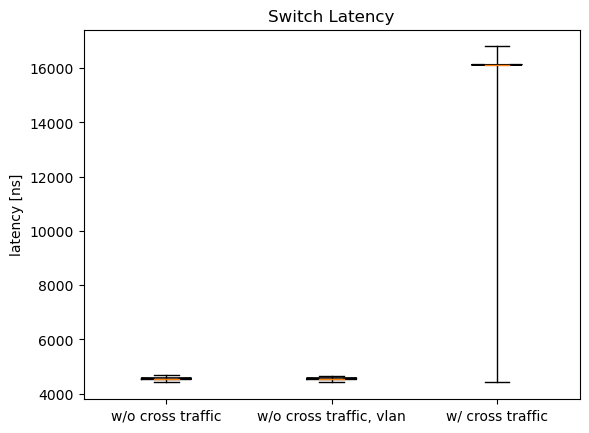

In [12]:
labels = ['w/o cross traffic', 'w/o cross traffic, vlan', 'w/ cross traffic']
data = [df_nocross.latency, df_nocross_vlan.latency, df_cross.latency]

_ = plt.boxplot(data, notch=True, whis=[0,100], labels=labels)
plt.ylabel('latency [ns]')
plt.xlabel('');
plt.title('Switch Latency');